# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [197]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [198]:
#from google.colab import drive
#drive.mount('/content/drive')

In [199]:
# read the csv data
df = pd.read_csv('foodhub_order.csv')
# display the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [200]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
There are 1898 rows and 9 columns in the data.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The data types are integers, float, string.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [202]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [203]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no missing values in any row of the data. There are 1898 rows and there are 1898 values for all the respective columns.

* There are no missing values, also when df.isnull().sum() is called.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [204]:
# Write your code here

df['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations:
The minimum time for food preparation is 20.00 minutes.
The average time for food preparation is 27.37 minutes.
The maximum time for food preparation is 35.00 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [205]:
# Write the code here
df[df['rating']=='Not given'].shape

(736, 9)

#### Observations:
There are 736 orders that are not rated (number of rows).

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Text(0.5, 1.0, 'Histogram showing Cost of the Order')

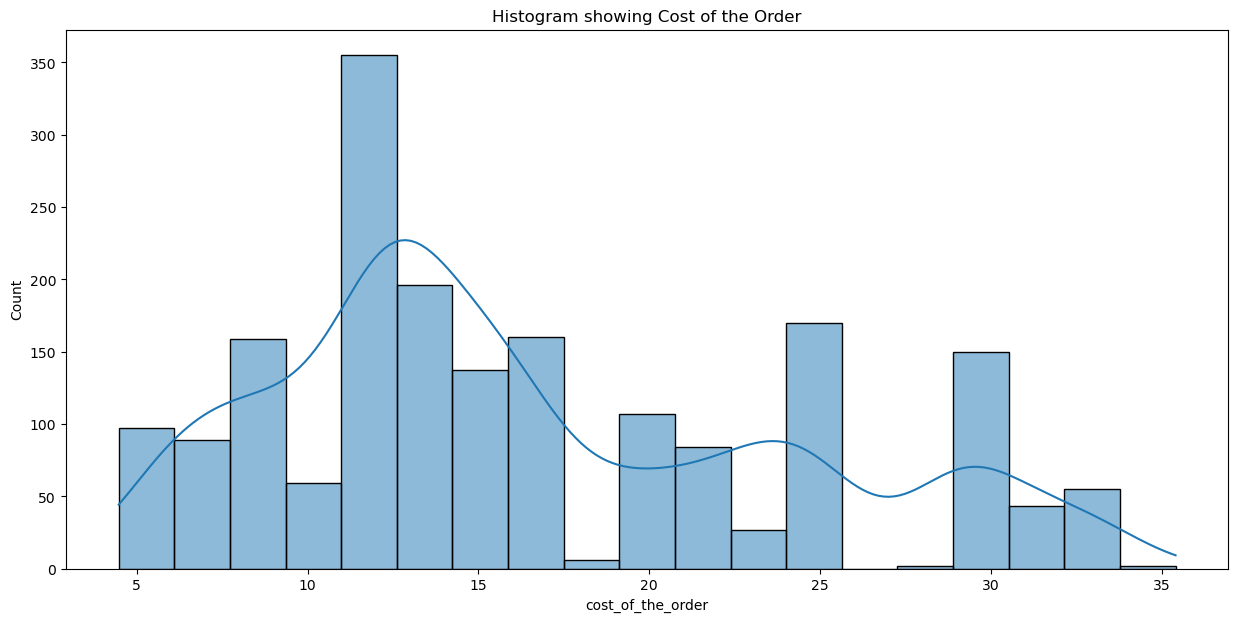

In [206]:
# Write the code here
plt.figure(figsize=(15,7))

# Plot Histogram
sns.histplot(data=df, x='cost_of_the_order',  kde=True)
plt.title('Histogram showing Cost of the Order')



The histogram of cost of order does not show a normal distribution. The cost with the highest count is around $11.

Text(0.5, 1.0, 'Box Plot showing Cost of the Order')

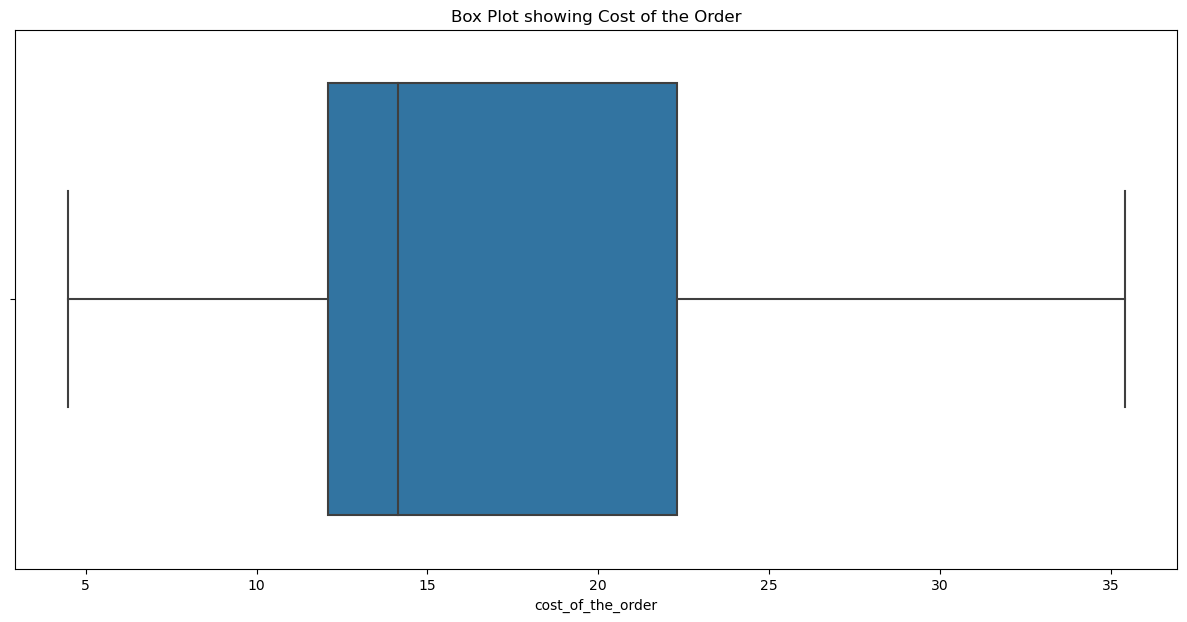

In [207]:
plt.figure(figsize=(15,7))

sns.boxplot(data =df, x = 'cost_of_the_order');

plt.title('Box Plot showing Cost of the Order')

The mean of cost of order is $14.
25% percentile is $12 and 75% percentile is $23.
Min and max value is 4 dollar and 35 dollar.

Text(0.5, 1.0, 'Histogram showing Food Preparation Time')

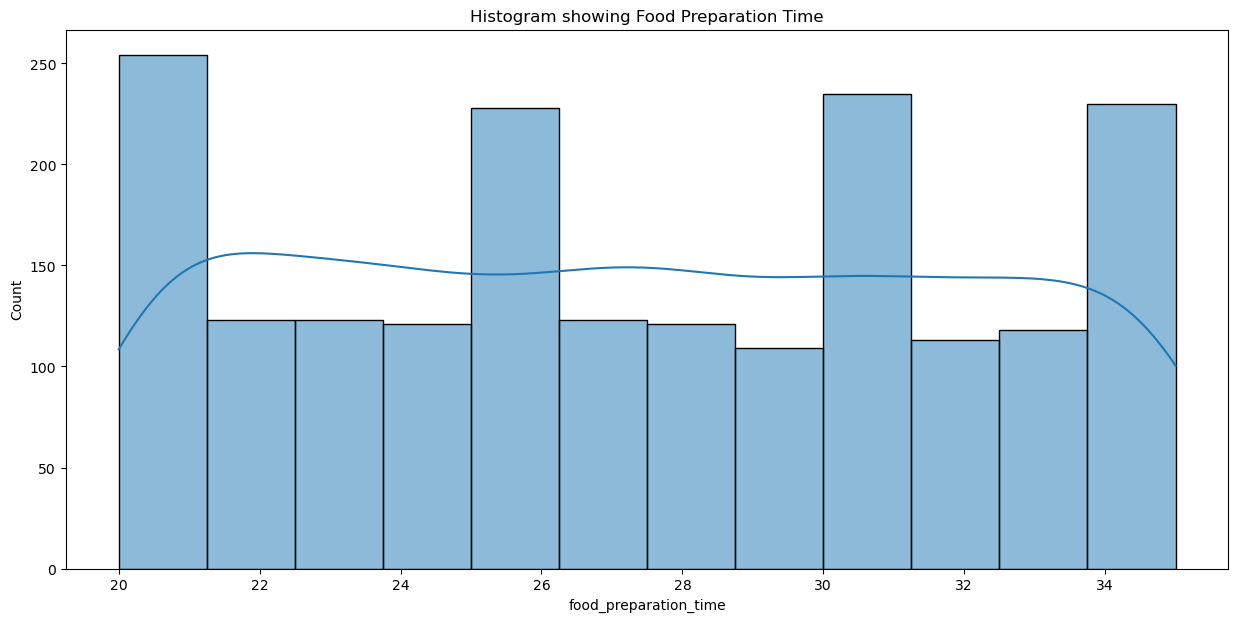

In [208]:
plt.figure(figsize=(15,7))

# Histogram for cost of the order
sns.histplot(data=df, x='food_preparation_time',  kde=True)
plt.title('Histogram showing Food Preparation Time')

The histogram of food preparation time does not show a normal distribution. The food preparation time with highest count is 21 minutes , with a count of 250.

Text(0.5, 1.0, 'Box Plot showing Food Preparation Time')

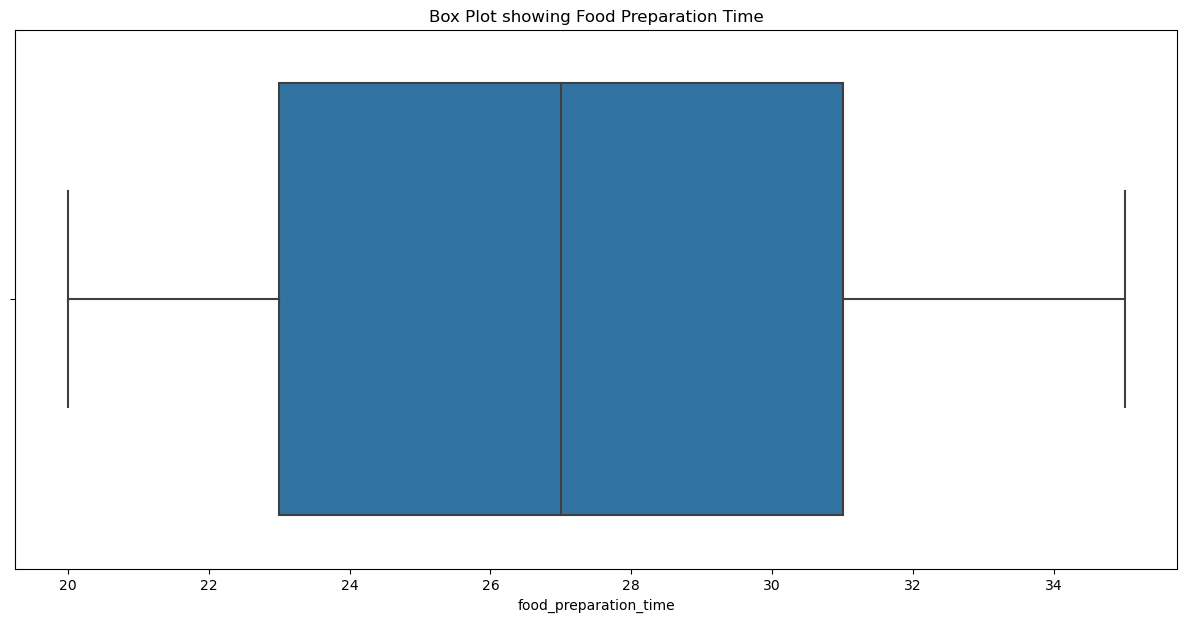

In [209]:
plt.figure(figsize=(15,7))

sns.boxplot(data =df, x = 'food_preparation_time');

plt.title('Box Plot showing Food Preparation Time')

The mean of food preparation time is 27 minute.
25% percentile is 23 minute and 75% percentile is 32 minute.
Minimum and maximum value is 20 minute and 35 minute.

Text(0.5, 1.0, 'Histogram showing Delivery Time')

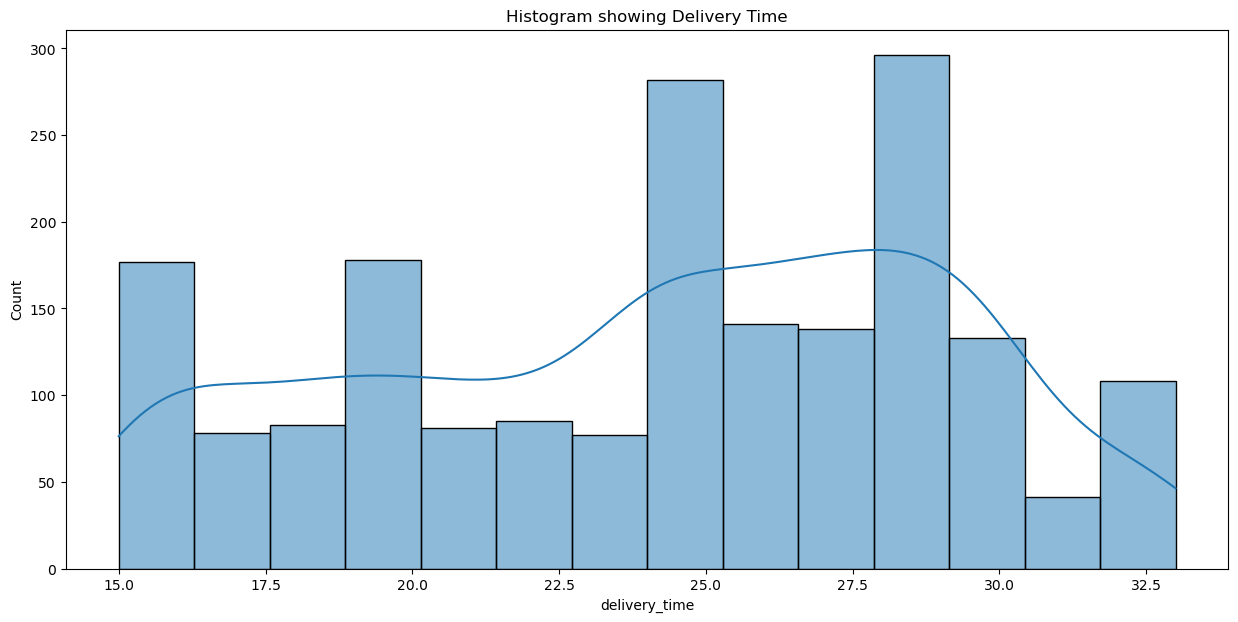

In [210]:
plt.figure(figsize=(15,7))

# Histogram for cost of the order
sns.histplot(data=df, x='delivery_time',  kde=True)
plt.title('Histogram showing Delivery Time')

The histogram of delivery time does not show a normal distribution. The delivery time with highest count is 28.5 minutes , with a count of 290.

Text(0.5, 1.0, 'Box Plot showing Delivery Time')

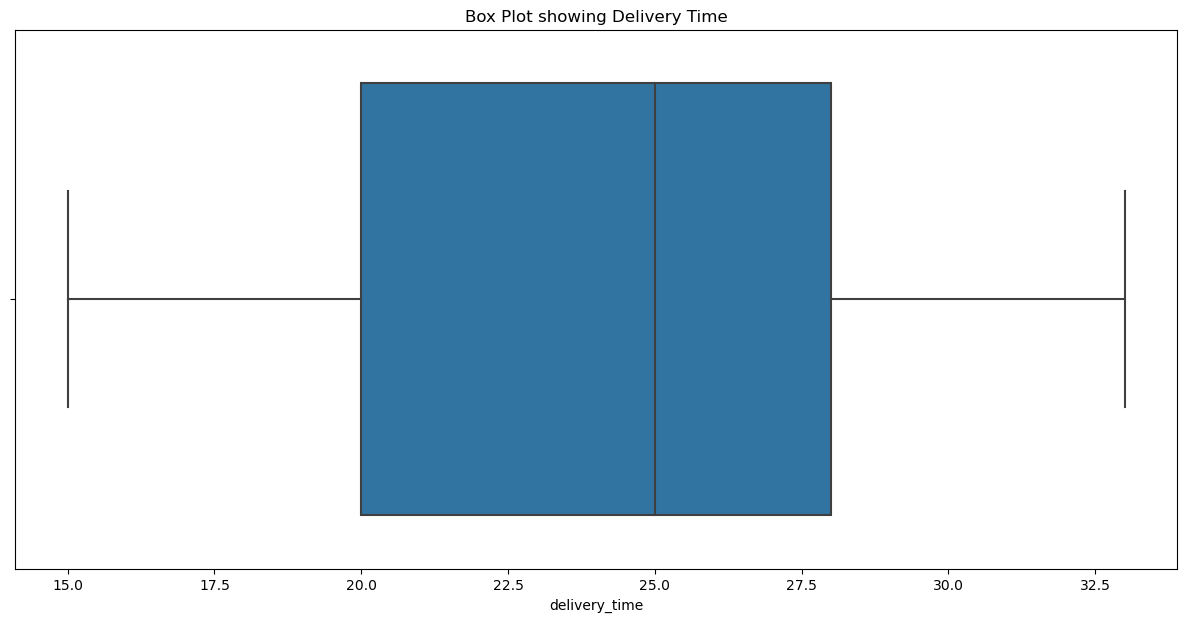

In [211]:
plt.figure(figsize=(15,7))

sns.boxplot(data =df, x = 'delivery_time');

plt.title('Box Plot showing Delivery Time')

The mean of delivery time is 25.0 minute.
25% percentile is 20.0 minute and 75% percentile is 28.5 minute.
Minimum and maximum value is 15.0 minute and 33.0 minute.

Text(0.5, 1.0, 'Distribution Plot of Ratings')

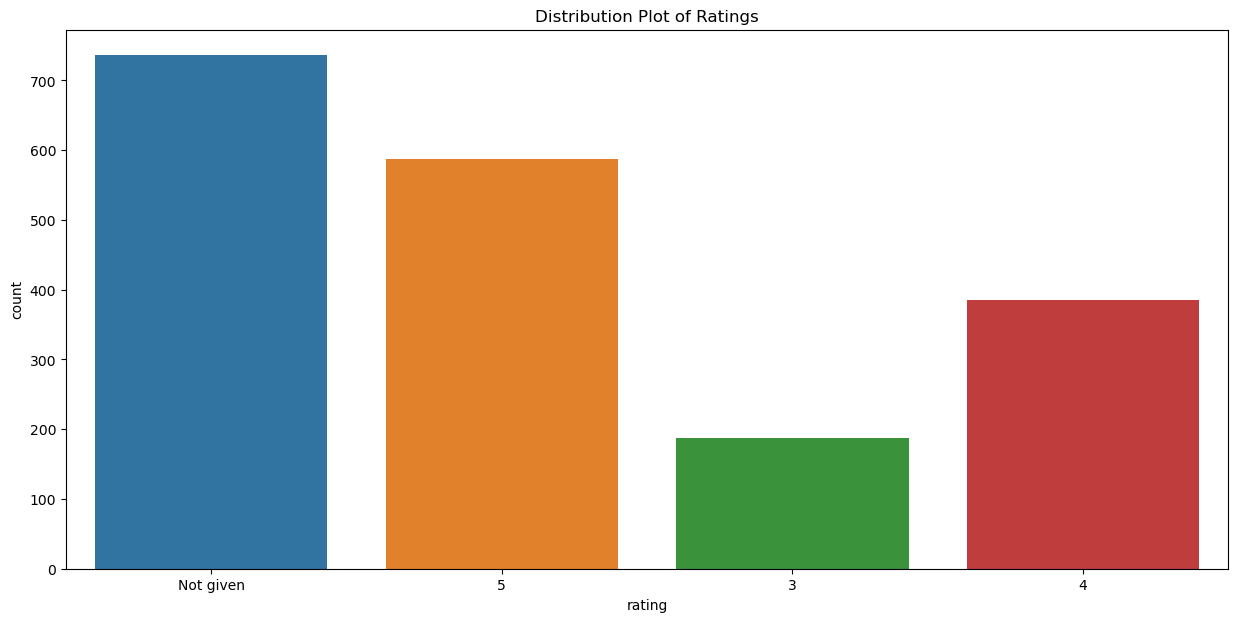

In [212]:
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='rating')
plt.title('Distribution Plot of Ratings')

The count plot show that the rating with highest count is 'Not given' with a count of around 740. While, the rating with lowest count is '3' with a count of around 190.

Not given rating columns will be removed so as to draw a box plot of the rating as a numerical data.

The highest count of rating is 'not given', followed by 5, 4 and then 3. :

In [213]:
new_rating = df.copy()
new_rating = new_rating[new_rating['rating'] != 'Not given']
new_rating['rating'] = pd.to_numeric(new_rating['rating']) 


Text(0.5, 1.0, 'Box Plot showing Rating')

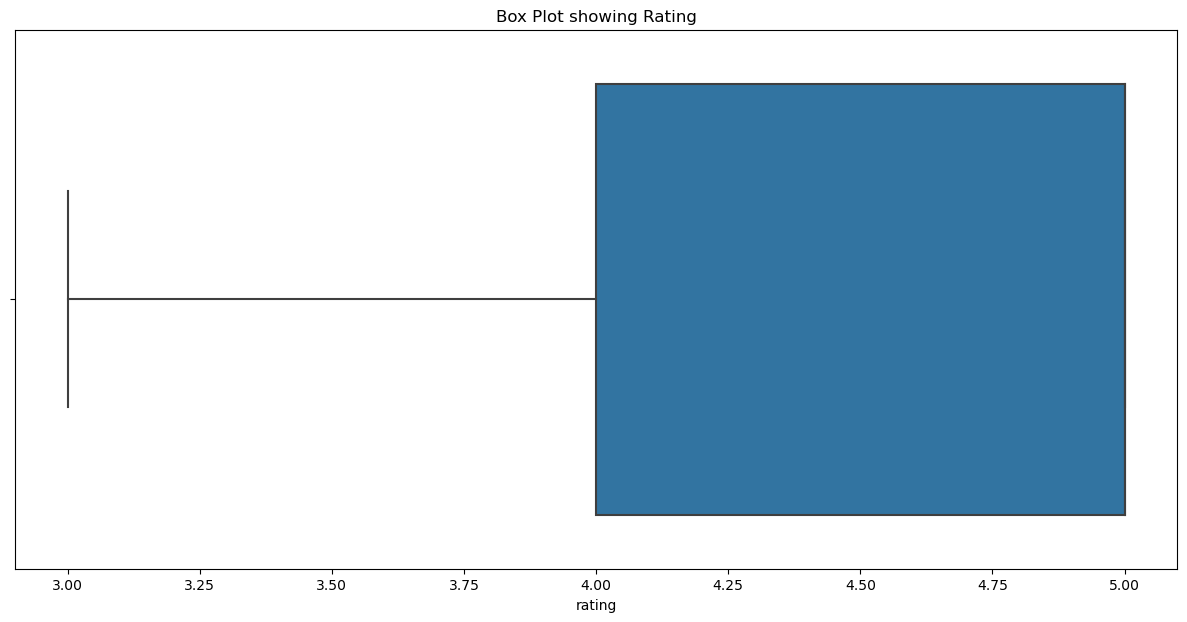

In [214]:
plt.figure(figsize=(15,7))

sns.boxplot(data =new_rating, x = 'rating');

plt.title('Box Plot showing Rating')


25% percentile is rating 4.00 and 75% percentile is rating 5.00.
Minimum value is rating 3.00.

In [215]:
df['restaurant_name'].nunique()

178

### Restaurants
There are 178 unique restaurants in the data set.

C:\Users\Timothy Ho\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 140 (\x8c) missing from current font.
  func(*args, **kwargs)
C:\Users\Timothy Ho\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)
C:\Users\Timothy Ho\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Timothy Ho\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


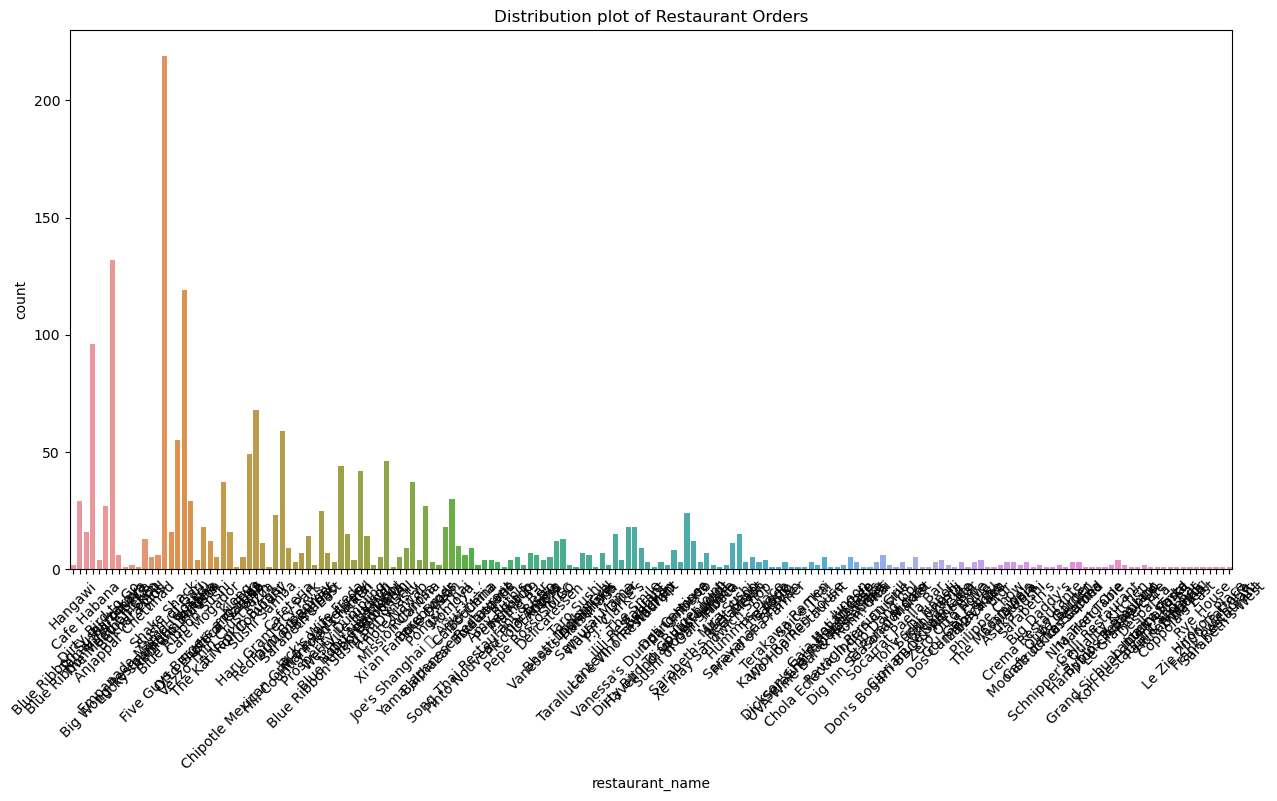

In [216]:
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='restaurant_name')
plt.title('Distribution plot of Restaurant Orders')
plt.xticks(rotation=45);

 The distribution plot above shows the number of orders for all restaurants. Due to the large number of restaurants, 
 only the top 10 and bottom 10 will be focused on. 

Text(0.5, 1.0, 'Distribution plot of Top 10 Restaurants')

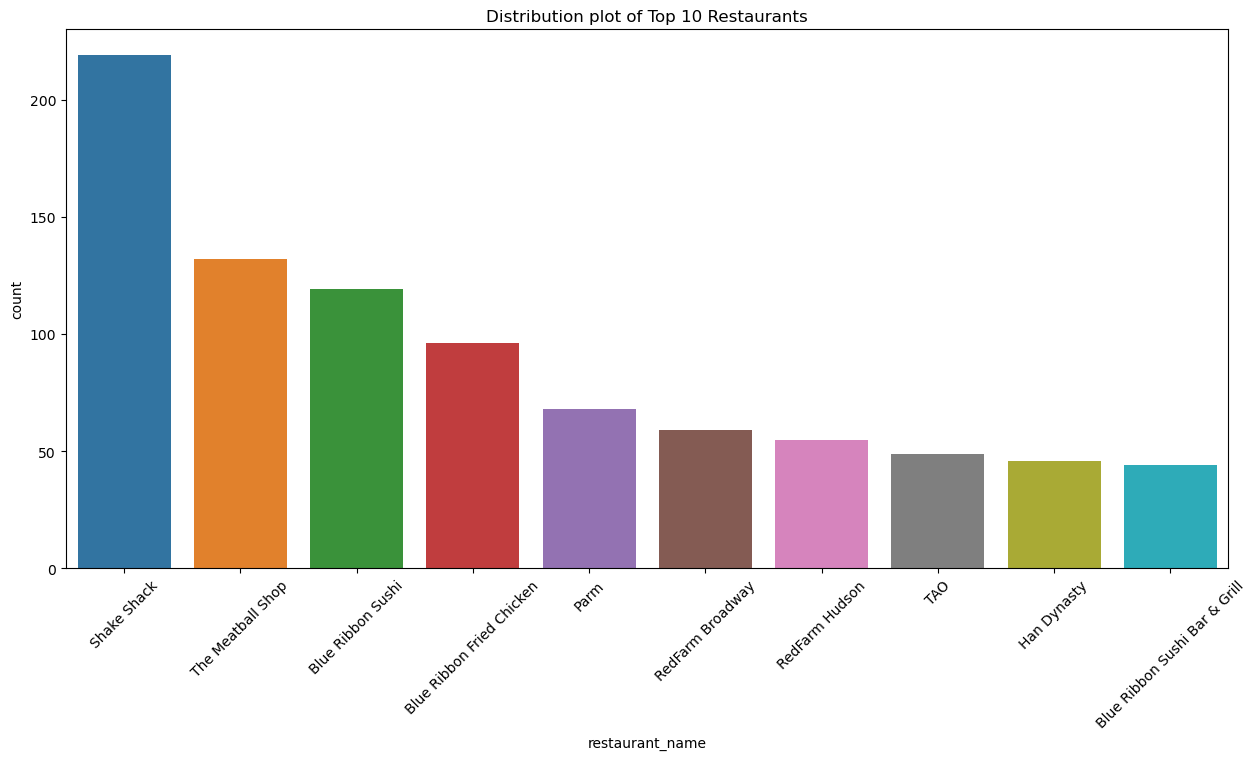

In [217]:
restaurant_counts = df['restaurant_name'].value_counts()
top_10_restaurants = restaurant_counts.head(10)


plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='restaurant_name', order=top_10_restaurants.index)
plt.xticks(rotation=45)
plt.title('Distribution plot of Top 10 Restaurants')


The top 10 restaurants are above. The top ten restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm,  RedFarm Broadway, RedFarm Hudson, TAO, Han Dynasty, Blue Ribbon Sushi Bar and Grill . 

Text(0.5, 1.0, 'Distribution plot of Last 10 Restaurants')

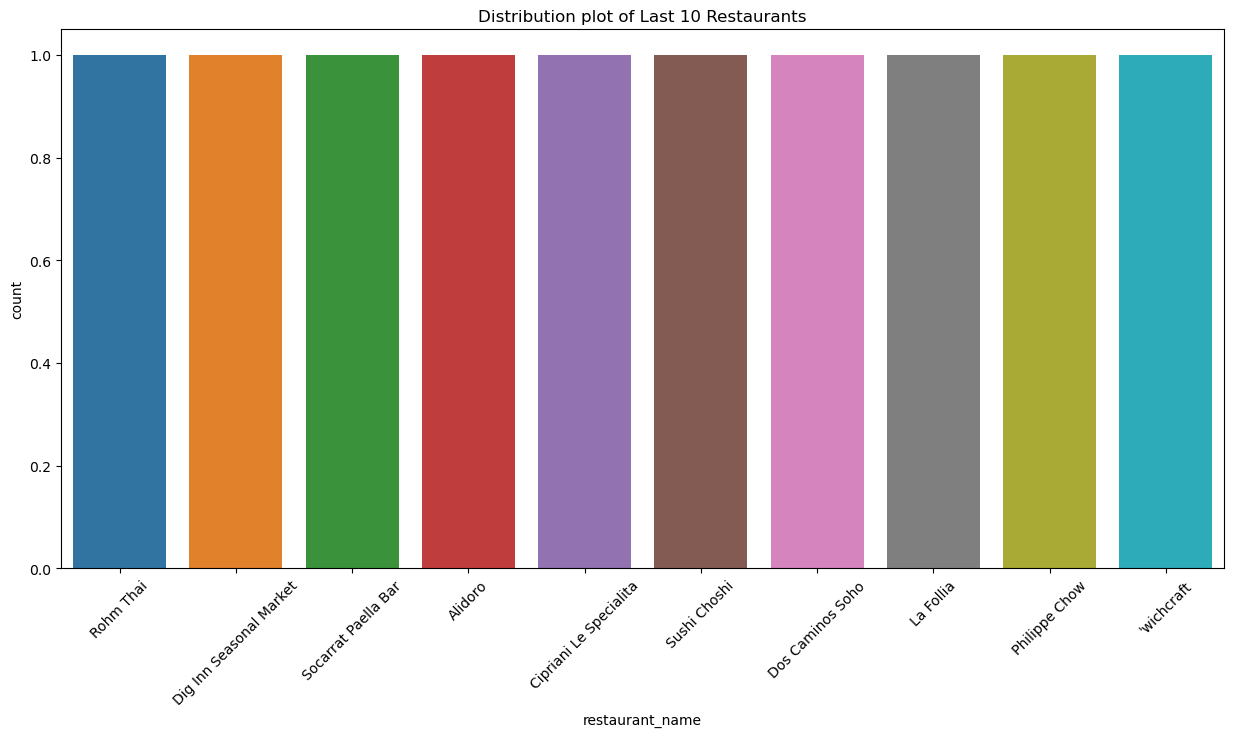

In [218]:
last_10_restaurants = restaurant_counts.tail(10)

plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='restaurant_name', order=last_10_restaurants.index)
plt.xticks(rotation=45)
plt.title('Distribution plot of Last 10 Restaurants')


The bottom 10 restaurants are above. The bottom ten restaurants are Rohm Thai, Dig Inn Seasonal Market, Soccarat Paella Bar,
Alidoro, Cipriani Le Specialita, Sushi Choshi, Dos Caminos Soho, La Follia, Phillipe Chow, wichcract. 

Text(0.5, 1.0, 'Distribution Plot of Cuisine')

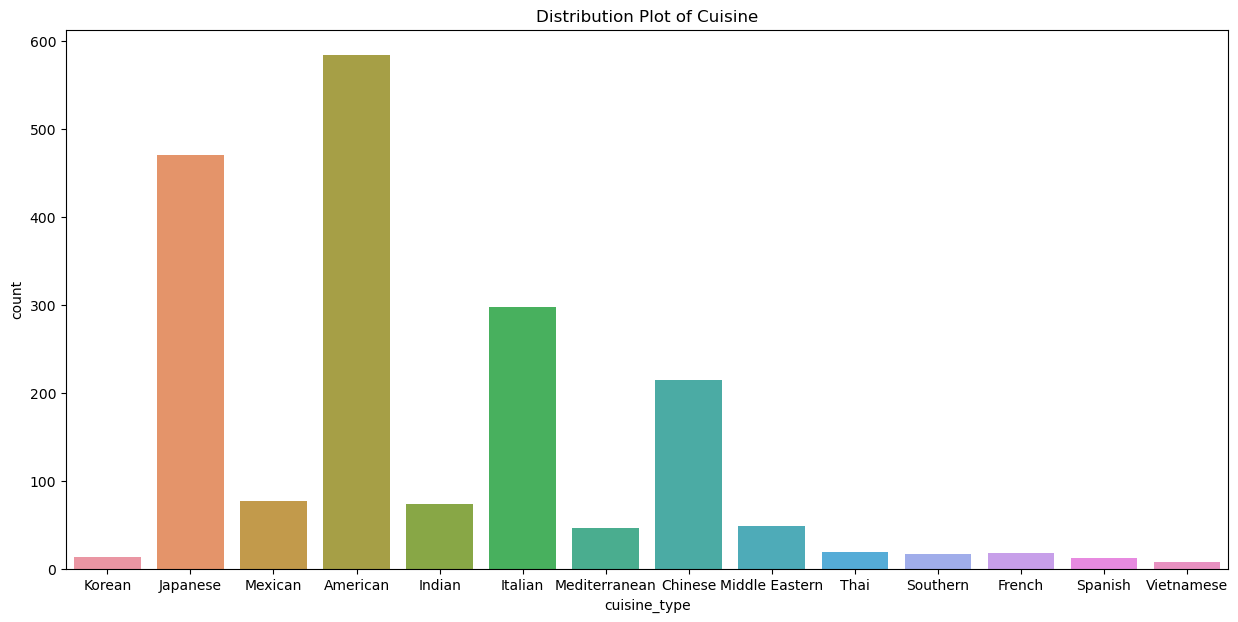

In [219]:
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='cuisine_type')
plt.title('Distribution Plot of Cuisine')

The count of cuisine are above. The top three cusine types are American, Japanese, Italian etc. 

Text(0.5, 1.0, 'Distribution of Day when order is made')

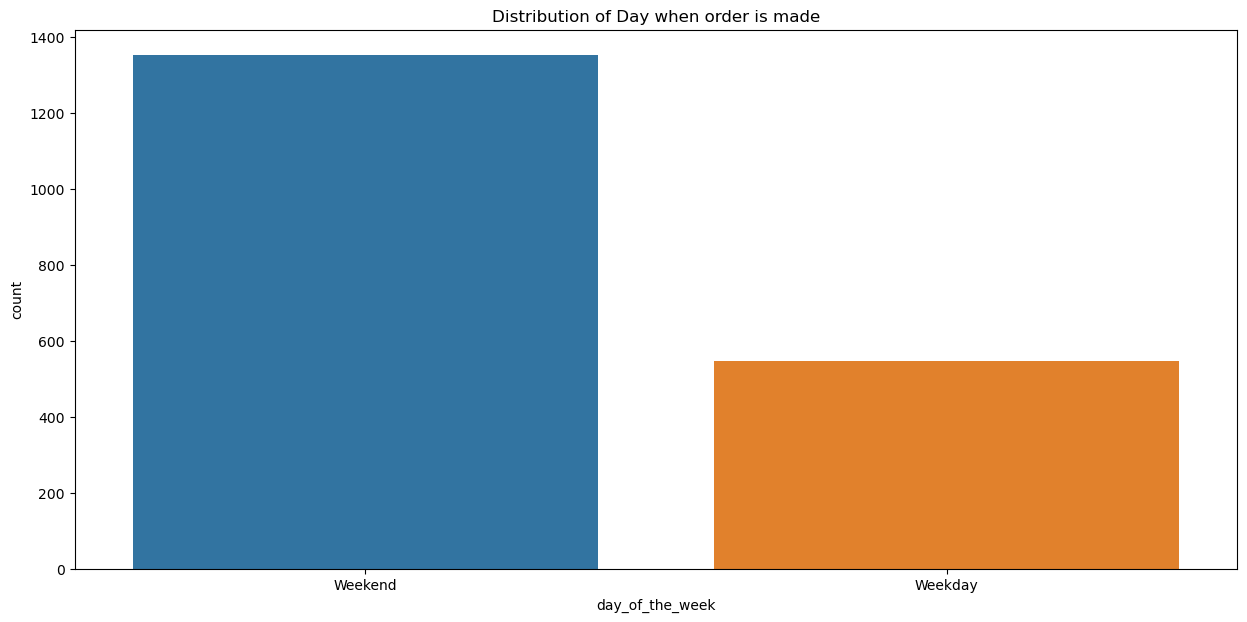

In [220]:
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='day_of_the_week')
plt.title('Distribution of Day when order is made')

The count of day order is placed is above. There are more orders placed on weekend than weekday. 

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

Text(0.5, 1.0, 'Distribution of Top 5 Restaurants')

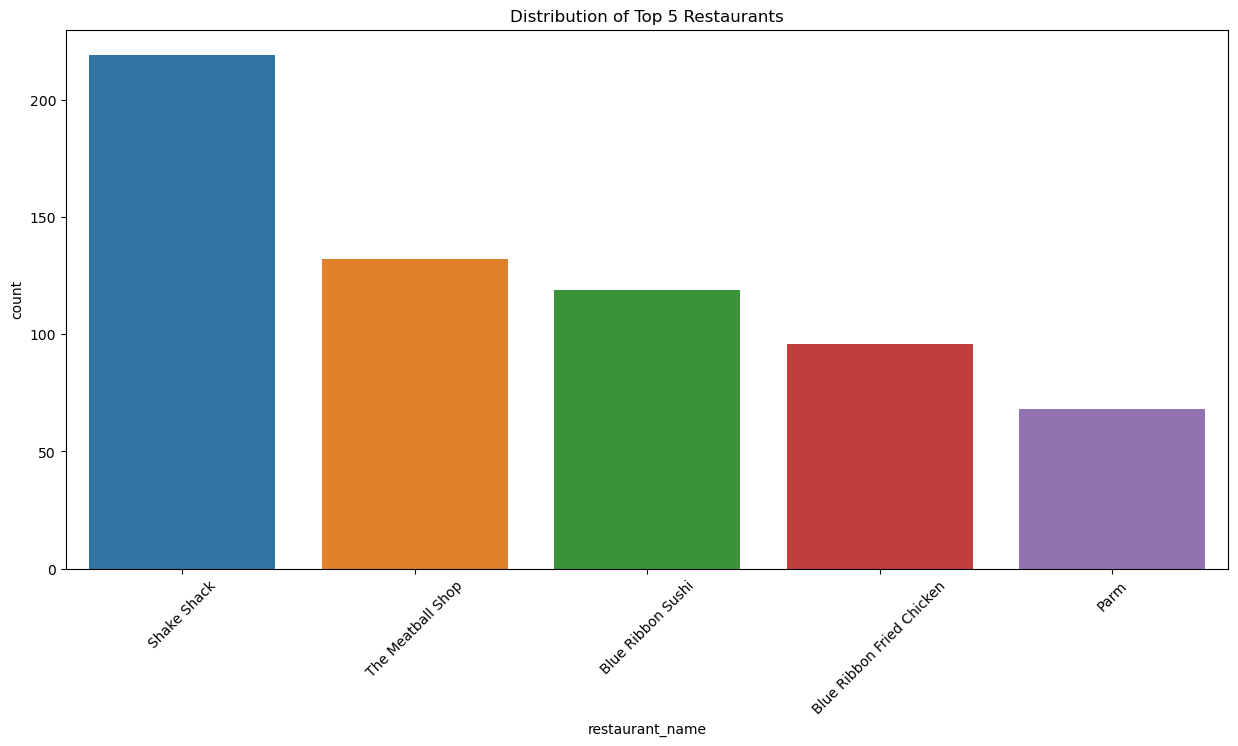

In [221]:
# Write the code here
restaurant_counts = df['restaurant_name'].value_counts()
top_5_restaurants = restaurant_counts.head(5)


plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='restaurant_name', order=top_5_restaurants.index)
plt.xticks(rotation=45)
plt.title('Distribution of Top 5 Restaurants')

#### Observations:
The top 5 restaurants are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [222]:
# Write the code here
weekend_data = df[df['day_of_the_week'] == 'Weekend']

weekend_data['cuisine_type'].value_counts().idxmax()


'American'

#### Observations:
The most popular cuisine on weekends is 'American' cuisine.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [223]:
# Write the code here
orders_above_20 = df[df['cost_of_the_order'] > 20]
percentage_above_20 = (orders_above_20.shape[0] / df.shape[0]) * 100
print("The percentage of order more than 20 dollars is",percentage_above_20)

The percentage of order more than 20 dollars is 29.24130663856691


#### Observations:
The percentage of orders above 20 dollars is 29.24 %.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [224]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations:
The mean order delivery time is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [225]:
# Write the code here

customer_order_number = df['customer_id'].value_counts()

customer_order_number.head(3)


52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
The top 3 highest visting customers have customer ID 52832, 47440, 83287.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


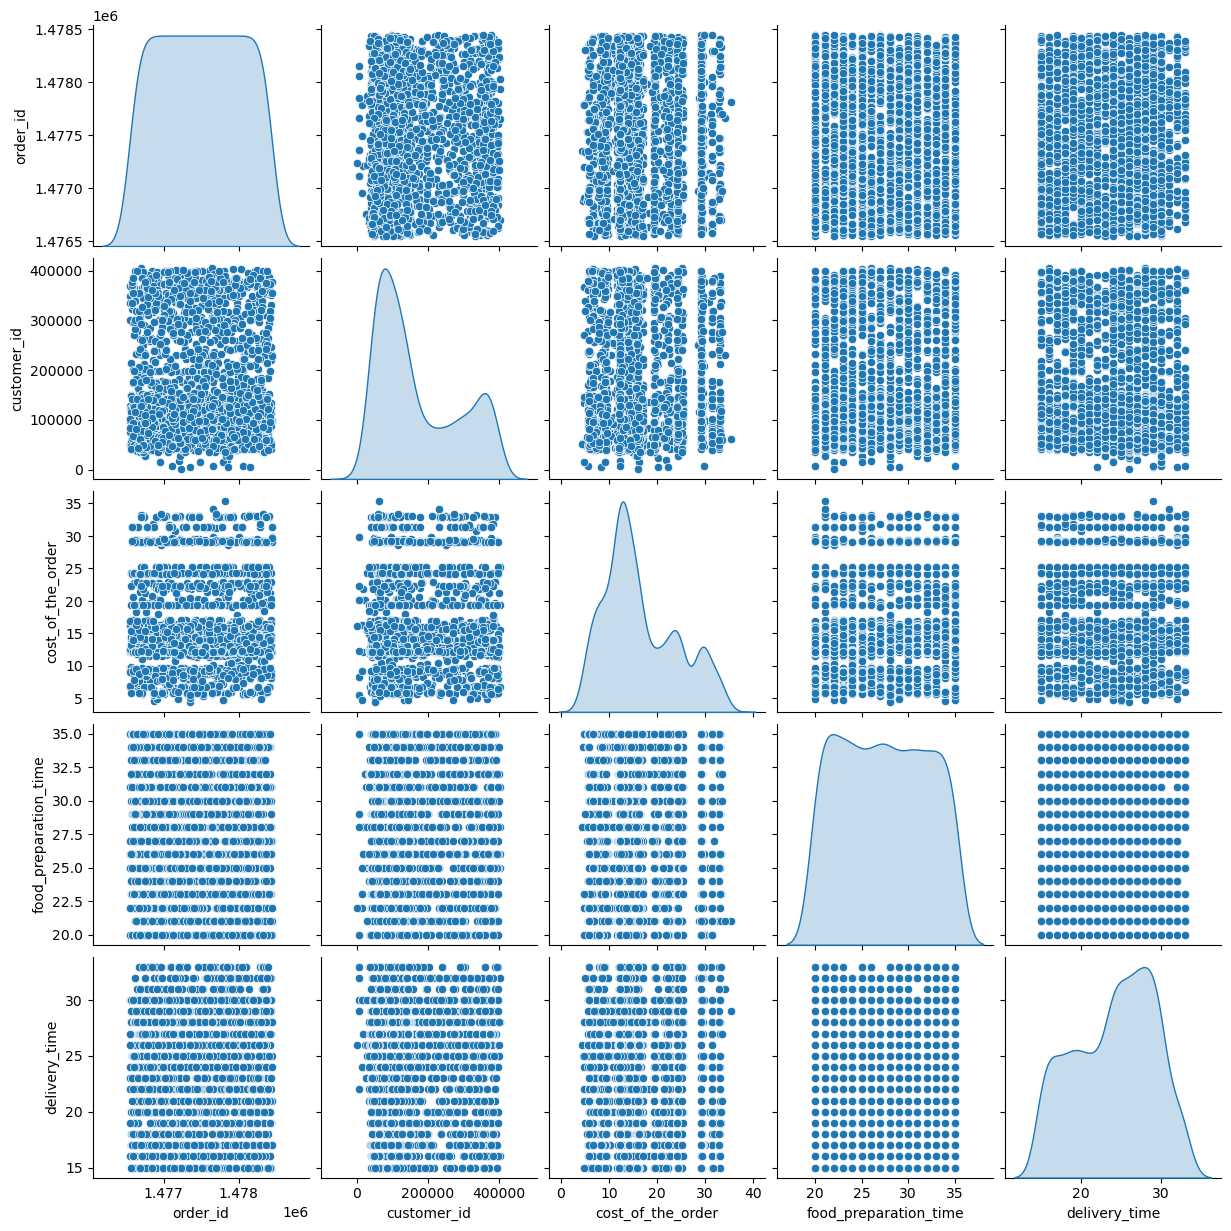

In [226]:
# Write the code here
sns.pairplot(df, diag_kind="kde");

There is a positive correlation between sum_time and food_preparation_time, and for sum_time and delivery_time. This could be because sum_time is dervied from adding delivery_time and food_preparation_time.

As for the other remaining variables appearing in the pairplot, there does not appear to have a association between the plotted variables. 

In [227]:
correlation = df.corr(numeric_only=True) # create correlation chart
correlation

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
order_id,1.000000,-0.013960,0.021171,-0.007026,0.009690
customer_id,-0.013960,1.000000,-0.001322,-0.030330,-0.009885
cost_of_the_order,0.021171,-0.001322,1.000000,0.041527,-0.029949
food_preparation_time,-0.007026,-0.030330,0.041527,1.000000,0.011094
delivery_time,0.009690,-0.009885,-0.029949,0.011094,1.000000


The is a rather high correlation between sum_time and food_preparation_time (0.69), and for sum_time and delivery_time (0.74). This is also highlighed in the shade of the heatmap seen below. 

As for the other remaining variables appearing in the correlation chart, the correlation values are not high, indicating a lack of correlation. This is also observed when plotted in the heatmap below. 

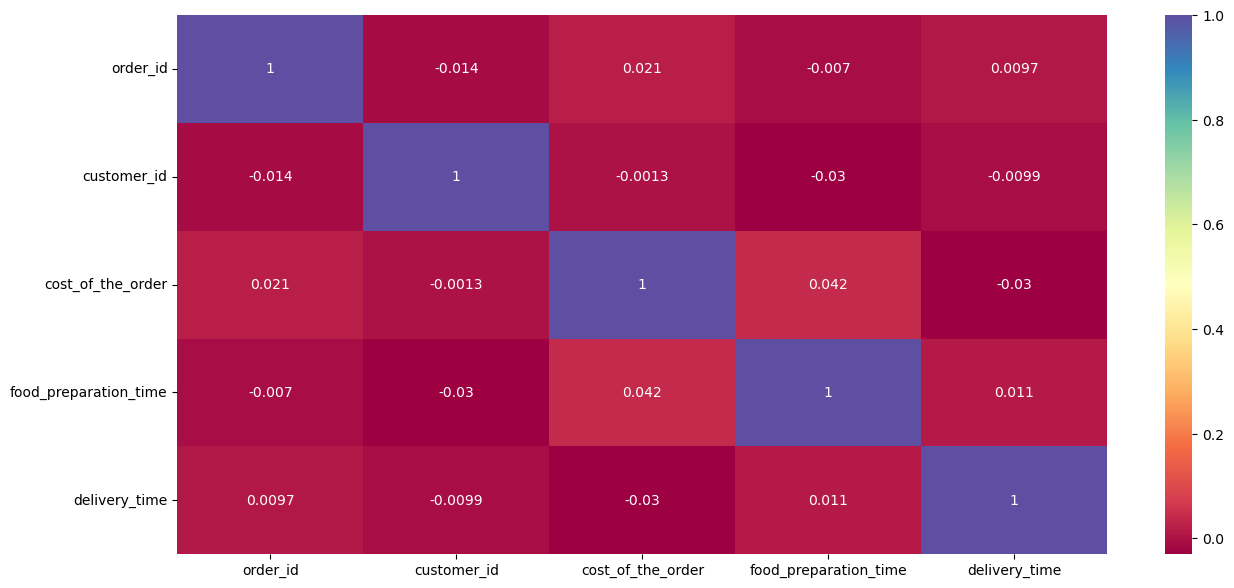

In [228]:
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, cmap="Spectral");

Text(0.5, 1.0, 'Box Plot of Cost against Cuisine')

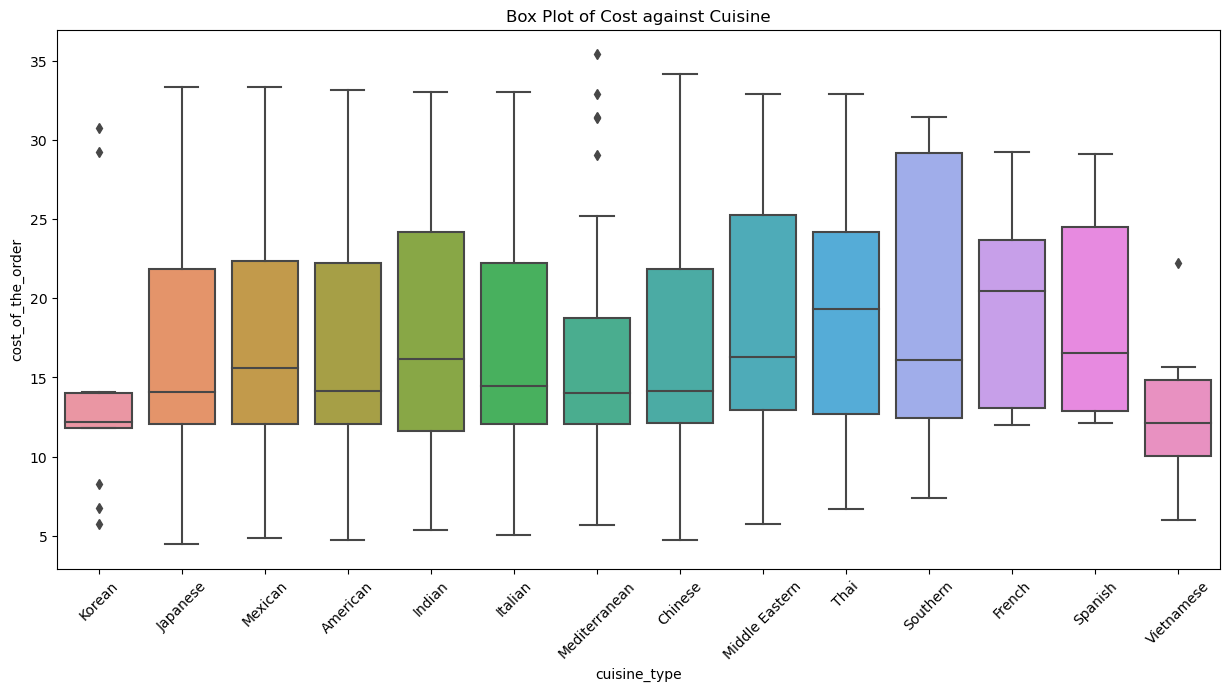

In [229]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=45)
plt.title("Box Plot of Cost against Cuisine")


The five cuisine type with highest average costs are French, Thai, Indian, Middle Eastern and Southern. The two cuisine type with lowest average costs are Korean and Vietnamese. There are outlier order costs for Korean, Mediterranean and Vietnamese cuisines. 

Text(0.5, 1.0, '10 Restaurants with highest food preparation time')

C:\Users\Timothy Ho\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 140 (\x8c) missing from current font.
  func(*args, **kwargs)
C:\Users\Timothy Ho\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


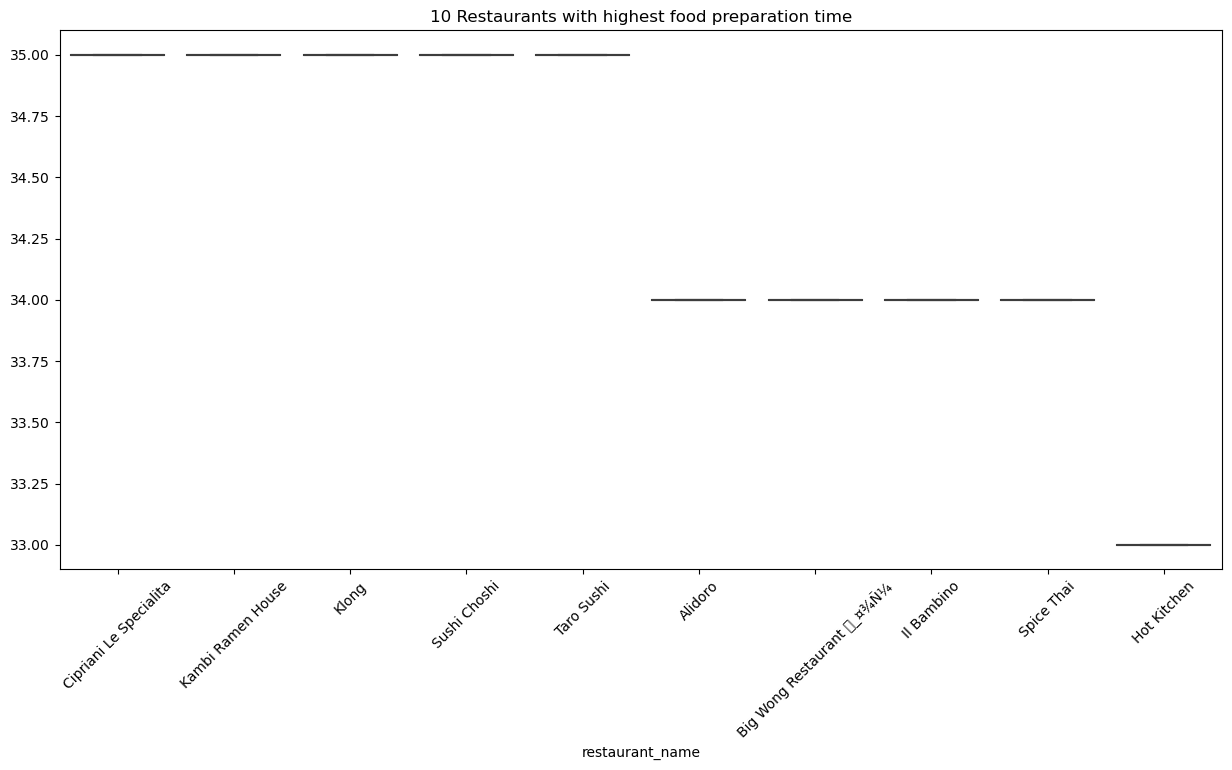

In [230]:
rest_average_prep_time = df.groupby('restaurant_name')['food_preparation_time'].mean()

highest_10_restaurant_longest_preparation = rest_average_prep_time.nlargest(10)
plt.figure(figsize=(15, 7))
sns.boxplot(x=highest_10_restaurant_longest_preparation.index, y=highest_10_restaurant_longest_preparation.values)
plt.xticks(rotation=45)
plt.title("10 Restaurants with highest food preparation time")

The ten restaurants with highest food preparation time are:
35.00 minutes - Cipriani Le Specialita, Kambi Ramen House, Klong, Sushi Choshi, Taro Sushi.
34.00 minutes - Alidoro, Big Wong Restaurant, Il Bambino, Spice Thai. 
33.00 minutes - Hot Kitchen. 

Text(0.5, 1.0, '10 Restaurants with lowest food preparation time')

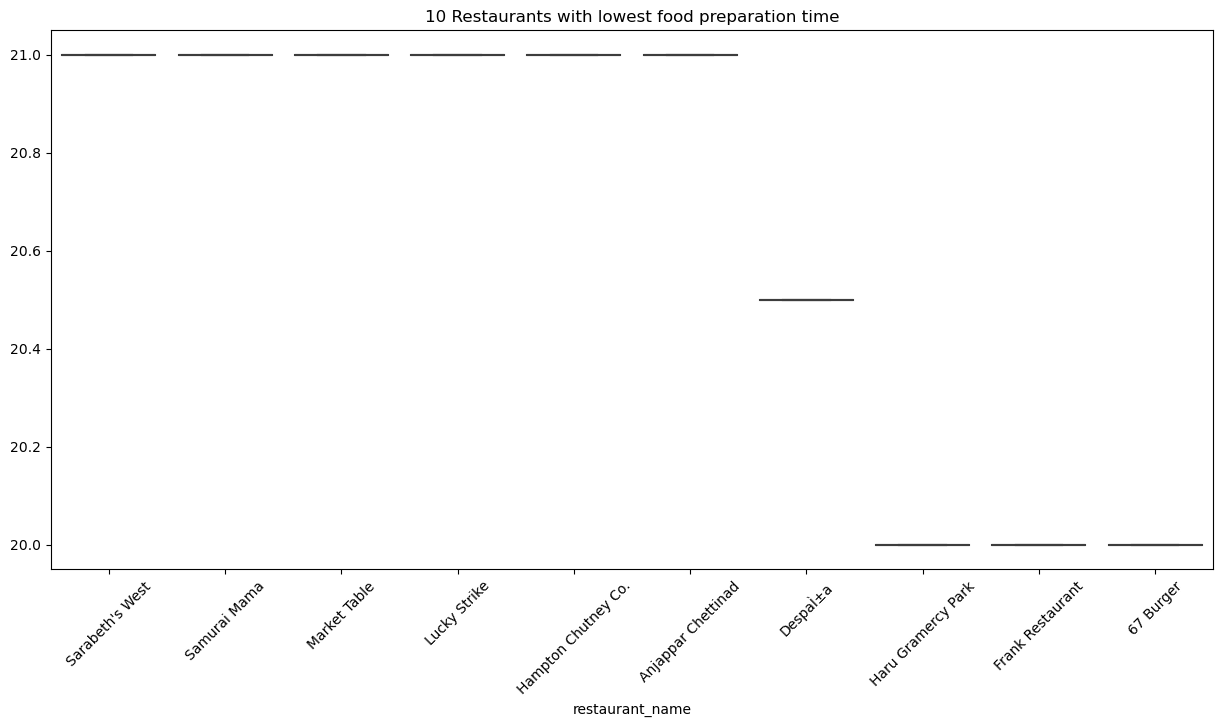

In [231]:
rest_average_prep_time = df.groupby('restaurant_name')['food_preparation_time'].mean()

lowest_10_restaurant_longest_preparation = rest_average_prep_time.nsmallest(10)[::-1]
plt.figure(figsize=(15, 7))
sns.boxplot(x=lowest_10_restaurant_longest_preparation.index, y=lowest_10_restaurant_longest_preparation.values)
plt.xticks(rotation=45)
plt.title("10 Restaurants with lowest food preparation time")

The ten restaurants with lowest food preparation time are:
21.0 minutes - Sarabeth's West, Samurai Mama,  Market Table, Lucky Strike, Hampton Chutney Co., Anjappar Chettinad.
20.5 minutes - Despaita. 
20.0 minutes - Haru Gramercy Park, Frank Restaurant, 67 Burger. 

Text(0.5, 1.0, '10 Restaurant with highest cost')

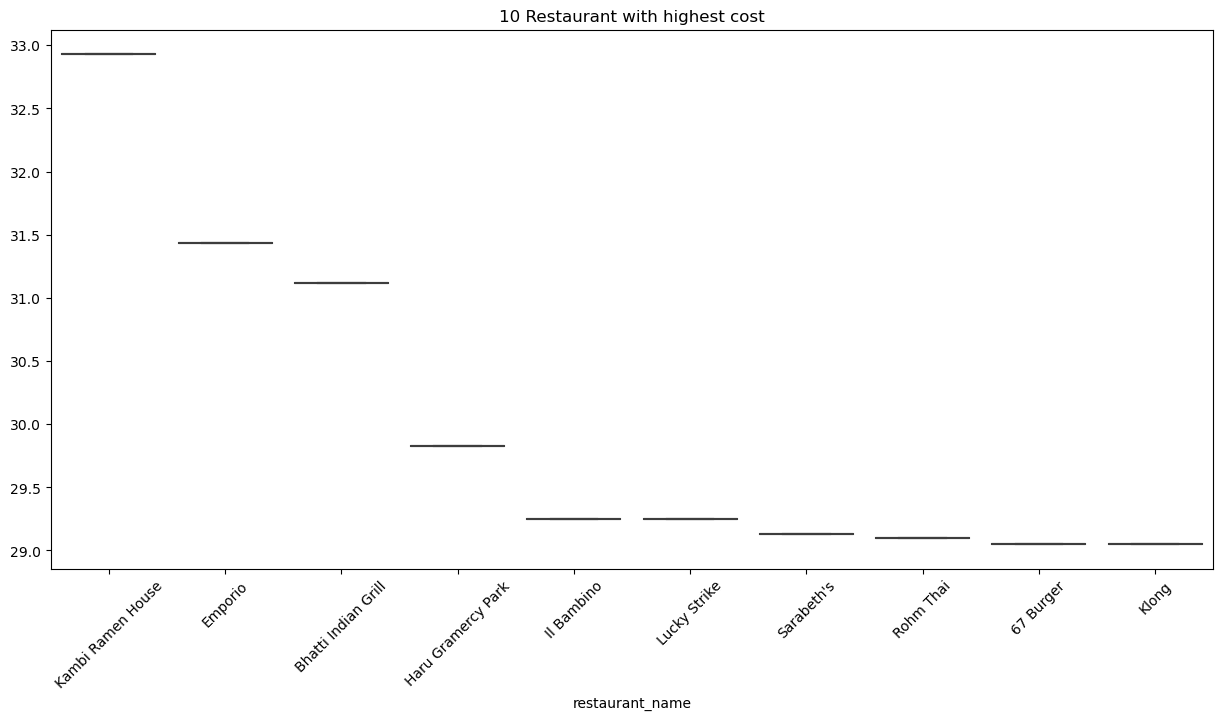

In [232]:
rest_average_cost = df.groupby('restaurant_name')['cost_of_the_order'].mean()

highest_10_restaurant_cost = rest_average_cost.nlargest(10)
plt.figure(figsize=(15, 7))
sns.boxplot(x=highest_10_restaurant_cost.index, y=highest_10_restaurant_cost.values)
plt.xticks(rotation=45)
plt.title("10 Restaurant with highest cost")

The ten restaurants with highest cost are:
32.9 dollars - Kambi Ramen House.
31.4 dollars - Emporio.
31.1 dollars - Bhatti Indian Grill.
29.7 dollars - Haru Gramercy Park.
29.3 dollars - Il Bambino, Lucky Strike. 
29.2 dollars - Sarabeths, Rohm Thai.  
29.1 dollars - 67 Burger, Klong.  

Text(0.5, 1.0, '10 Restaurant with lowest cost')

C:\Users\Timothy Ho\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 140 (\x8c) missing from current font.
  func(*args, **kwargs)
C:\Users\Timothy Ho\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


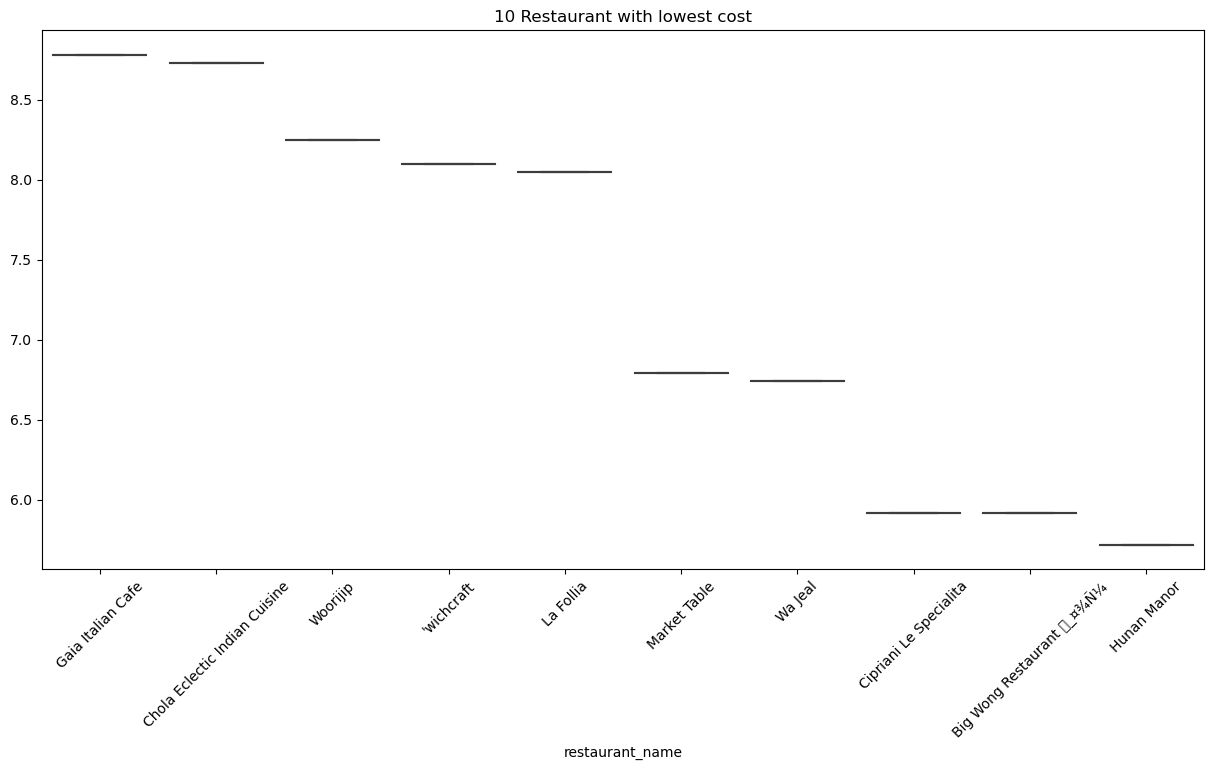

In [233]:
rest_average_cost = df.groupby('restaurant_name')['cost_of_the_order'].mean()

lowest_10_restaurant_cost = rest_average_cost.nsmallest(10)[::-1]
plt.figure(figsize=(15, 7))
sns.boxplot(x=lowest_10_restaurant_cost.index, y=lowest_10_restaurant_cost.values)
plt.xticks(rotation=45)
plt.title("10 Restaurant with lowest cost")

The ten restaurants with lowest cost are:
8.8 dollars - Gaia Italian Cafe.
8.7 dollars - Chola Eclectic Indian Cuisine.
8.3 dollars - Woorijip.
8.2 dollars - wichraft.
8.15 dollars - La Follia. 
6.7 dollars - Market Table.  
6.65 dollars - Wa jeal.  
5.85 dollars - Cipriani Le Specialita, Big Wong Restaurant.  
5.7 dollars - Hunan Manor.  

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [234]:
df['rating'].unique()


array(['Not given', '5', '3', '4'], dtype=object)

In [235]:
new_rating = df[df['rating'] != 'Not given']
new_rating

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


In [236]:
new_rating['rating'].unique()

array(['5', '3', '4'], dtype=object)

In [237]:
# Write the code here
new_rating = df.copy()

new_rating = new_rating[new_rating['rating'] != 'Not given']
new_rating['rating'] = pd.to_numeric(new_rating['rating'])

# aggregate according to the criteria
restaurant_criteria = new_rating.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Filter restaurants fulfilling the criteria for the promotional offer
qualified_restaurants = restaurant_criteria[
    (restaurant_criteria['count'] > 50) & (restaurant_criteria['mean'] > 4)
]
qualified_restaurants



,count,mean
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


#### Observations:
The four restaurants are Blue Ribbon Fried Chicken, Blue Ribbon Sushi , Shake Shack, The Meatball Shop.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [238]:
# Write the code here
net_revenue = 0
for index, row in df.iterrows():
    cost = row['cost_of_the_order']
    if cost > 20:
        net_revenue += cost * 0.25  # 25% charge
    elif cost > 5:
        net_revenue += cost * 0.15  # 15% charge
    else:
        net_revenue += cost

net_revenue

6209.042999999994

#### Observations:
The  net revenue generated by the company is $25148.52, to 2 decimal places.  

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [239]:
# Write the code here
df['sum_time'] = df['food_preparation_time'] + df['delivery_time']
more_than_60_minutes = df[df['sum_time'] > 60].shape[0]
total_order = df.shape[0]

percentage_answer = (more_than_60_minutes/total_order) *100
percentage_answer


10.537407797681771

#### Observations:
10.54 % of orders take more than 60 minutes to get delivered from the time the order is placed (to 2 decimal place).

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [240]:
# Write the code here
df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()



28.340036563071298

In [241]:
df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

22.4700222057735

#### Observations:
The mean delivery time of the orders on weekdays is 28.34 minutes and is 22.47 minutes on weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

In [242]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
sum_time                 0
dtype: int64

In [243]:
df.rating.value_counts(normalize=True, dropna=False)

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

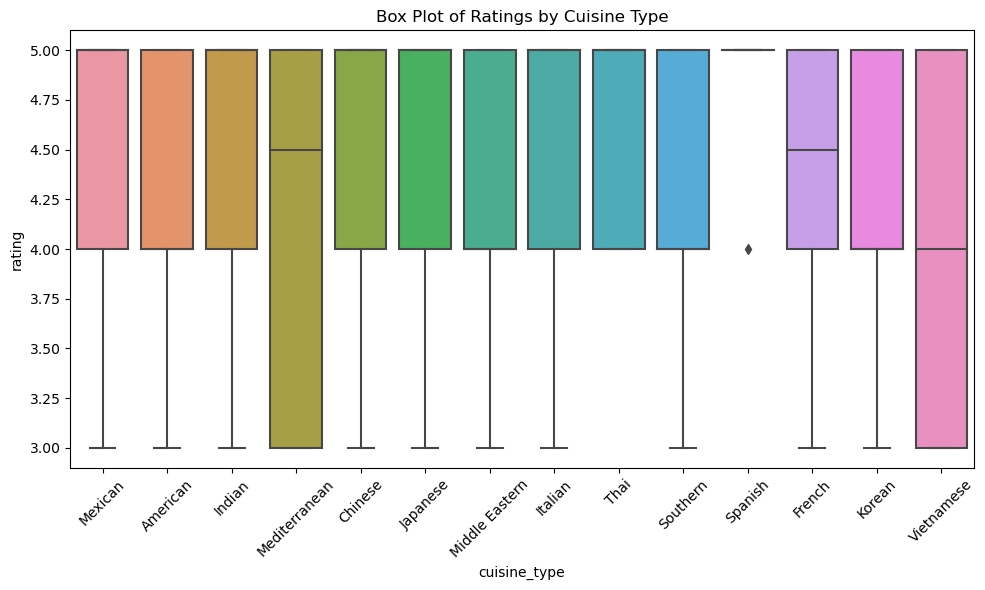

Mean Ratings by Cuisine Type:
cuisine_type
Spanish           4.833333
Thai              4.666667
Indian            4.540000
Mexican           4.416667
Japanese          4.373626
Italian           4.360465
Chinese           4.338346
Southern          4.307692
French            4.300000
American          4.298913
Middle Eastern    4.235294
Mediterranean     4.218750
Korean            4.111111
Vietnamese        4.000000
Name: rating, dtype: float64


In [244]:
new_rating = df.copy()
new_rating = new_rating[new_rating['rating'] != 'Not given']
new_rating['rating'] = pd.to_numeric(new_rating['rating'])



# Create a box plot of ratings by cuisine type
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_rating, x='cuisine_type', y='rating')
plt.title('Box Plot of Ratings by Cuisine Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate mean ratings for each cuisine type
mean_ratings_by_cuisine = new_rating.groupby('cuisine_type')['rating'].mean().sort_values(ascending=False)

# Print mean ratings by cuisine type
print("Mean Ratings by Cuisine Type:")
print(mean_ratings_by_cuisine)

### Conclusions:
1.  The top three highest average rating by cuisine type is Spanish (4.83), Thai (4.67), Indian (4.54).

2. Based on the Mean Ratings by Cuisine Type summary, the top three cuisine that can command highest cost are French, Thai and Indian.The bottom three cuisine type with lowest cost are Vietnamese, Korean, Mediterranean. Thus, food standards and popularity of the higher rated foods can result in these offerings being promoted to customers. They can also reflect previous ratings and reviews of such cuisine types in the application to customers. Food ratings that are less well rated could request for feedbacks, so that further refinement and improvement in food planning and preparation can be conducted. 

3. The box plot reveals that the 25 percentile and 75 percentile range for Mediterranean and Vietnamese is the largest.

4. From the chart on cost above, The five cuisine type with highest average costs are French, Thai, Indian, Middle Eastern and Southern. The two cuisine type with lowest average costs are Korean and Vietnamese. Thus, more restaurants which are selling French, Thai, Indian, Middle Eastern and Southern cuisines should be enrolled to the platform - to help with profits. For other cuisines with lower cost such as Korean and Vietnamese, more efforts should be done to push food and drink packages or revamping of the menu for more premium items. 

5. The amount of orders on the weekends exceed the amount of orders on the weekdays. This indicates that weekends are more popular for people to order take out food. This informs us that conducting campaigns and promotions can viably target the weekend to capitalise on the crowd and weekend activities. More delivery riders and restaurants can be activated to remain open and active on the weekends to cater to the hungry customers. 


### Recommendations:

1.  To increase the profit of the food platform, recommending higher cost cuisine orders (like French, Thai and Indian) are recommended.

2.  To boost the popularity of the food platform among users,Spanish , Thai , Indian food can be promoted.

3. There could be tie in with Spanish themed Summer holiday package, Spanish school parties to boost the sale of Spanish cuisines.

4. The menu of Thai food could be expanded, operating hours extended to enable greater number of orders of Thai food. Spice Thai is shown to take a longer food preparation being in the top 10, therefore more staff could be added to the restaurant or delivery riders could be prioritised to send Thai food order to reduce waiting time.

5. Monitor customer feedback on food delivery timing, reasonableness of cost, rating. This is to ensure satisfaction rates are maintained.

6. Incentivise customers to provide more ratings for the food they order so as to better cater future recommendations and optimise data analysis. A complimentary meal or subsequent discount could be provided to encourage them to leave a rating. This is especially so when no answer is the most frequent rating recorded among all the rating entries.

7. More delivery drivers can be dispatched to the more popular restaurants to reduce the delivery time in receiving the order and getting the food sent to the customer. These top 10 restaurants include Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm,  RedFarm Broadway, RedFarm Hudson, TAO, Han Dynasty, Blue Ribbon Sushi Bar and Grill . 

8. Shops which take more than certain amount of time to prepare food should be given time reminders on  the application, so as to reduce wait times for customer. A discount for customer could be provided if orders exceed say 25 minutes for preparation and 20 minutes for delivery. 

9. Greater data analysis could be done to uncover why there seems to be lack of correlation between most variables (except food_preparation_time, and for sum_time and delivery_time). Proper sampling or classification could be pursued to understand any other further underlying trends affecting the variables. More data could be collected on location of orders, gender of customer in order to mine more trends in the variables in affecting ratings and cost of orders placed.  

---